# **Análise da Pegada de Carbono: Brasil e Comparações Globais**

Este projeto tem como objetivo analisar a pegada de carbono (carbon footprint) do Brasil e compará-la com diferentes contextos globais e regionais, incluindo o Continente Americano, a OCDE e os Estados Unidos. Utilizamos ferramentas de ciência de dados, estatística descritiva e aprendizado de máquina (ML) para identificar padrões, realizar previsões e responder a questões avançadas relacionadas às emissões de carbono. Além disso, integramos dados de fontes confiáveis e enriquecemos o dataset utilizando APIs públicas, promovendo uma análise robusta e detalhada.

## **Nomes dos Alunos**
- Gustavo Kenzo - RM 98481
- Vitor Shimizu - RM 550390
- Ian - RM 98387

---

### **Estrutura do Notebook**
1. **Ask**: Definição de perguntas de pesquisa e escopo.
2. **Get**: Coleta e integração de dados de múltiplas fontes confiáveis.
3. **Explore**: Limpeza, análise exploratória e combinação de dados.
4. **Model**: Modelagem com aprendizado de máquina, comparando algoritmos de regressão e classificação.
5. **Communicate**: Apresentação dos resultados em gráficos e tabelas, com explicações detalhadas e conclusões gerais.

---

### **Bibliotecas Utilizadas**
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`
- `scikit-learn`

---

### **Instruções para Execução**
Certifique-se de que todas as bibliotecas necessárias estão instaladas. Para executar este notebook:
1. Instale as dependências utilizando `pip install -r requirements.txt`.
2. Execute as células sequencialmente para reproduzir os resultados.

# **Etapa 1: Ask (Perguntas de Pesquisa)**

As perguntas de pesquisa definidas para este projeto são as seguintes:

1. Análise Comparativa: Consumo de Energia Renovável e Pegada de Carbono (Brasil vs OCDE)
2. Qual é a tendência da pegada de carbono total do Brasil nos últimos 10 anos?
Objetivo: Identificar o comportamento histórico das emissões de carbono no Brasil.
3. Como a pegada de carbono do Brasil se compara à média global ao longo dos últimos anos?
Objetivo: Determinar se as emissões do Brasil estão acima ou abaixo da média global.
4. Qual é a diferença percentual entre a pegada de carbono do Brasil e a do continente americano?
Objetivo: Analisar como o Brasil contribui para as emissões do continente americano.
5. Com base em dados históricos, qual é a previsão de pegada de carbono do Brasil para os próximos 10 anos?
Objetivo: Usar modelos preditivos para estimar as emissões futuras
6. Como as emissões de carbono per capita do Brasil se comparam com a média dos países da OCDE desde 1990?
7. As emissões do Brasil são mais próximas às dos EUA ou da média global?
Objetivo: Identificar se o Brasil está mais alinhado com grandes emissores como os EUA ou com a média global.
8. Análise das Previsões de Pegada de Carbono no Brasil
9. Análise do Consumo de Energia Eólica e Emissões de Carbono no Brasil
10. Existe uma correlação entre o PIB do Brasil e sua pegada de carbono ao longo dos anos?
Objetivo: Explorar se o crescimento econômico impulsiona diretamente as emissões de carbono.


In [13]:
import requests
import pandas as pd
import time

# Configurações da API
API_KEY = "36cc67bc5d3944cabed110537242011"
BASE_URL = "http://api.weatherapi.com/v1/current.json"

# Função para obter dados climáticos atuais
def get_current_weather(location):
    params = {
        "key": API_KEY,
        "q": location
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erro na requisição para {location}: {response.status_code}")
        return None

# Lista de países de interesse (exemplo para Continente Americano)
countries = ["Brazil", "Argentina", "Canada", "Mexico", "Chile", "Colombia", "Peru", "Venezuela", "Ecuador", "Bolivia", "Paraguay", "Uruguay", "Guyana", "Suriname", "Belize", "Costa Rica", "El Salvador", "Guatemala", "Honduras", "Nicaragua", "Panama", "Cuba", "Dominican Republic", "Haiti", "Jamaica", "Trinidad and Tobago", "Bahamas", "Barbados", "Saint Lucia", "Saint Vincent and the Grenadines", "Grenada", "Antigua and Barbuda", "Saint Kitts and Nevis"]

# Coletar dados para cada país
weather_data = []
for country in countries:
    data = get_current_weather(country)
    if data:
        weather_info = {
            "country": country,
            "temperature_c": data['current']['temp_c'],
            "humidity": data['current']['humidity'],
            "precip_mm": data['current']['precip_mm'],
            "wind_kph": data['current']['wind_kph'],
            "condition": data['current']['condition']['text']
        }
        weather_data.append(weather_info)
    # Respeitar limites de taxa da API
    time.sleep(1)  # Pausa de 1 segundo entre as requisições

# Converter para DataFrame
weather_df = pd.DataFrame(weather_data)
print(weather_df)


                             country  temperature_c  humidity  precip_mm  \
0                             Brazil           22.1        83       0.00   
1                          Argentina           19.2        73       0.00   
2                             Canada            5.1       100       3.45   
3                             Mexico            8.5        86       0.00   
4                              Chile           18.1        30       0.00   
5                           Colombia           12.3       100       0.01   
6                               Peru           17.9        83       0.00   
7                          Venezuela           17.2        91       0.00   
8                            Ecuador           10.6        97       0.04   
9                            Bolivia            7.4       100       0.01   
10                          Paraguay           23.1        94       0.37   
11                           Uruguay           16.2        88       0.00   
12          

In [14]:
# Calcular médias para o Continente Americano
americas_avg = weather_df.mean(numeric_only=True)
print("Médias para o Continente Americano:")
print(americas_avg)


Médias para o Continente Americano:
temperature_c    20.075758
humidity         87.575758
precip_mm         0.154242
wind_kph          9.375758
dtype: float64


In [15]:
import requests
import pandas as pd
import time

# Configurações da API
API_KEY = "36cc67bc5d3944cabed110537242011"
BASE_URL = "http://api.weatherapi.com/v1/current.json"

# Lista de países membros da OCDE
oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia",
    "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
    "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom", "United States"
]

# Função para coletar dados climáticos de um país
def get_current_weather(country):
    params = {
        "key": API_KEY,
        "q": country
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Erro ao buscar dados de {country}: {response.status_code}")
        return None

# Coletar dados para todos os países da OCDE
weather_data = []
for country in oecd_countries:
    data = get_current_weather(country)
    if data:
        weather_info = {
            "country": country,
            "temperature_c": data['current']['temp_c'],
            "humidity": data['current']['humidity'],
            "precip_mm": data['current']['precip_mm'],
            "wind_kph": data['current']['wind_kph'],
            "condition": data['current']['condition']['text']
        }
        weather_data.append(weather_info)
    time.sleep(1)  # Respeitar os limites de taxa da API gratuita

# Converter para DataFrame
weather_df = pd.DataFrame(weather_data)

# Exibir os dados coletados
print(weather_df)

# Salvar em um arquivo CSV
weather_df.to_csv("oecd_weather_data.csv", index=False)


            country  temperature_c  humidity  precip_mm  wind_kph  \
0         Australia           20.3        56       0.00       9.0   
1           Austria            5.1        52       0.00      23.0   
2           Belgium            1.2        75       0.00      10.4   
3            Canada            5.1       100       3.45      23.0   
4             Chile           18.1        30       0.00       3.6   
5          Colombia           12.3       100       0.01       3.6   
6        Costa Rica           13.8        96       0.00       6.8   
7    Czech Republic            2.4        69       0.00      23.8   
8           Denmark            1.0        80       0.43       8.6   
9           Estonia            2.3        75       0.04      30.6   
10          Finland            0.2       100       0.21      41.0   
11           France            1.3       100       1.91      17.3   
12          Germany            3.1        75       0.00      18.0   
13           Greece           22.3

In [18]:
import pandas as pd

# Certifique-se de que o DataFrame foi carregado
# Substitua pelo caminho correto ou pela variável onde os dados estão armazenados
# Por exemplo, se você tiver salvo os dados climáticos em um arquivo CSV:
oecd_weather_df = pd.read_csv("oecd_weather_data.csv")

# Calcular as médias para colunas numéricas
averages = oecd_weather_df.mean(numeric_only=True)

# Exibir as médias calculadas
print("Médias Climáticas dos Países da OCDE:")
print(averages)

Médias Climáticas dos Países da OCDE:
temperature_c     6.539474
humidity         73.605263
precip_mm         0.188158
wind_kph         17.465789
dtype: float64


In [20]:
# Coletar dados do Brasil e EUA
brazil_weather = get_current_weather("Brazil")
usa_weather = get_current_weather("United States")

# Criar DataFrames
brazil_weather_df = pd.DataFrame([brazil_weather])
usa_weather_df = pd.DataFrame([usa_weather])

# Exibir os DataFrames
print("Dados Climáticos do Brasil:")
print(brazil_weather_df)

print("\nDados Climáticos dos EUA:")
print(usa_weather_df)

Dados Climáticos do Brasil:
  country  temperature_c  humidity  precip_mm  wind_kph      condition
0  Brazil           22.1        83        0.0       6.1  Partly cloudy

Dados Climáticos dos EUA:
         country  temperature_c  humidity  precip_mm  wind_kph condition
0  United States            2.8        89        0.0      13.7  Overcast


In [45]:
# Carregar os arquivos CSV
carbon_data = pd.read_csv("carbon_data.csv")
world_energy_consumption = pd.read_csv("world_energy_consumption.csv")

# Exibir os primeiros registros de cada dataset para inspeção
print("Dados de Carbon Data:")
print(carbon_data.head())

print("\nDados de Energy Data:")
print(world_energy_consumption.head())

Dados de Carbon Data:
  Country Name country_code                     Region  \
0        Aruba          ABW  Latin America & Caribbean   
1  Afghanistan          AFG                 South Asia   
2       Angola          AGO         Sub-Saharan Africa   
3      Albania          ALB      Europe & Central Asia   
4      Andorra          AND      Europe & Central Asia   

                           Indicator Name      1990      1991      1992  \
0  CO2 emissions (metric tons per capita)       NaN       NaN       NaN   
1  CO2 emissions (metric tons per capita)  0.191745  0.167682  0.095958   
2  CO2 emissions (metric tons per capita)  0.553662  0.544539  0.543557   
3  CO2 emissions (metric tons per capita)  1.819542  1.242810  0.683700   
4  CO2 emissions (metric tons per capita)  7.521832  7.235379  6.963079   

       1993      1994      1995  ...      2011      2012      2013      2014  \
0       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
1  0.084721  0.075

In [46]:
# Verificar e exibir valores nulos no dataset de emissões de carbono
print("Valores nulos em carbon_data:")
print(carbon_data.isnull().sum())

# Remover linhas com valores nulos em carbon_data
carbon_data_cleaned = carbon_data.dropna()

# Verificar e exibir valores nulos no dataset de consumo de energia
print("\nValores nulos em world_energy_consumption:")
print(world_energy_consumption.isnull().sum())

# Remover linhas com valores nulos em world_energy_consumption
world_energy_consumption_cleaned = world_energy_consumption.dropna()

# Resumo após a limpeza
print("\nResumo do dataset carbon_data_cleaned:")
print(carbon_data_cleaned.info())
print(carbon_data_cleaned.head())

print("\nResumo do dataset world_energy_consumption_cleaned:")
print(world_energy_consumption_cleaned.info())
print(world_energy_consumption_cleaned.head())


Valores nulos em carbon_data:
Country Name       0
country_code       0
Region             0
Indicator Name     0
1990              30
1991              29
1992              26
1993              26
1994              26
1995              25
1996              25
1997              25
1998              26
1999              26
2000              25
2001              25
2002              24
2003              24
2004              24
2005              24
2006              24
2007              24
2008              24
2009              24
2010              24
2011              24
2012              24
2013              24
2014              24
2015              24
2016              24
2017              24
2018              24
2019              24
2019.1            24
dtype: int64

Valores nulos em world_energy_consumption:
country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                  

In [47]:
# Verificar e exibir valores nulos nos dados climáticos
print("\nValores nulos nos dados climáticos (climate_data):")
print(climate_data.isnull().sum())

# Remover linhas com valores nulos
climate_data_cleaned = climate_data.dropna()

# Exibir resumo após a limpeza
print("\nResumo dos dados climáticos limpos:")
print(climate_data_cleaned.info())
print(climate_data_cleaned.head())


Valores nulos nos dados climáticos (climate_data):
country          0
temperature_c    0
humidity         0
precip_mm        0
wind_kph         0
condition        0
dtype: int64

Resumo dos dados climáticos limpos:
<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 37
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        40 non-null     object 
 1   temperature_c  40 non-null     float64
 2   humidity       40 non-null     int64  
 3   precip_mm      40 non-null     float64
 4   wind_kph       40 non-null     float64
 5   condition      40 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.2+ KB
None
         country  temperature_c  humidity  precip_mm  wind_kph      condition
0         Brazil           22.1        83        0.0       6.1  Partly cloudy
0  United States            2.8        89        0.0      13.7       Overcast
0      Australia           20.3   

In [48]:
# Verificar colunas em todos os datasets
print("Colunas em carbon_data_cleaned:", carbon_data_cleaned.columns)
print("Colunas em world_energy_consumption_cleaned:", world_energy_consumption_cleaned.columns)
print("Colunas em climate_data_cleaned:", climate_data_cleaned.columns)

# Renomear colunas, se necessário
if 'location' in climate_data_cleaned.columns:
    climate_data_cleaned.rename(columns={'location': 'country'}, inplace=True)


Colunas em carbon_data_cleaned: Index(['Country Name', 'country_code', 'Region', 'Indicator Name', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2019.1'],
      dtype='object')
Colunas em world_energy_consumption_cleaned: Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)
Colunas em climate_data_cleaned: Index(['country',

In [49]:
# Verificar colunas de cada DataFrame
print("Colunas em carbon_data_cleaned:", carbon_data_cleaned.columns)
print("Colunas em world_energy_consumption_cleaned:", world_energy_consumption_cleaned.columns)
print("Colunas em climate_data_cleaned:", climate_data_cleaned.columns)

Colunas em carbon_data_cleaned: Index(['Country Name', 'country_code', 'Region', 'Indicator Name', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2019.1'],
      dtype='object')
Colunas em world_energy_consumption_cleaned: Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)
Colunas em climate_data_cleaned: Index(['country',

In [50]:
# Renomear a coluna 'Country Name' para 'country' no carbon_data_cleaned
carbon_data_cleaned.rename(columns={'Country Name': 'country'}, inplace=True)

# Transformar os anos em formato longo (melt)
carbon_data_long = pd.melt(
    carbon_data_cleaned,
    id_vars=['country', 'country_code', 'Region', 'Indicator Name'],
    var_name='year',
    value_name='value'
)

# Converter o ano para formato numérico
carbon_data_long['year'] = pd.to_numeric(carbon_data_long['year'], errors='coerce')

# Verificar os dados transformados
print("Carbon Data após transformação para formato longo:")
print(carbon_data_long.head())

# Realizar a união com world_energy_consumption_cleaned
combined_data = pd.merge(
    carbon_data_long,
    world_energy_consumption_cleaned,
    on=["country", "year"],
    how="inner"
)

# Realizar a união com climate_data_cleaned
final_data = pd.merge(
    combined_data,
    climate_data_cleaned,
    on="country",
    how="inner"
)

# Exibir os dados finais combinados
print("\nDados finais combinados:")
print(final_data.head())


Carbon Data após transformação para formato longo:
                country country_code                      Region  \
0           Afghanistan          AFG                  South Asia   
1                Angola          AGO          Sub-Saharan Africa   
2               Albania          ALB       Europe & Central Asia   
3               Andorra          AND       Europe & Central Asia   
4  United Arab Emirates          ARE  Middle East & North Africa   

                           Indicator Name    year      value  
0  CO2 emissions (metric tons per capita)  1990.0   0.191745  
1  CO2 emissions (metric tons per capita)  1990.0   0.553662  
2  CO2 emissions (metric tons per capita)  1990.0   1.819542  
3  CO2 emissions (metric tons per capita)  1990.0   7.521832  
4  CO2 emissions (metric tons per capita)  1990.0  30.195189  

Dados finais combinados:
         country country_code                 Region  \
0         Canada          CAN          North America   
1        Germany        

<ipython-input-50-b54c2fb64c0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carbon_data_cleaned.rename(columns={'Country Name': 'country'}, inplace=True)
<ipython-input-50-b54c2fb64c0d>:20: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  combined_data = pd.merge(


In [51]:
# Converter a coluna 'year' em carbon_data_long para inteiro
carbon_data_long['year'] = carbon_data_long['year'].astype(int)

# Certificar-se de que a coluna 'year' em world_energy_consumption_cleaned também é inteira
# Garantir que uma cópia explícita seja feita
world_energy_consumption_cleaned = world_energy_consumption.dropna().copy()

# Converter o ano para inteiro de forma segura
world_energy_consumption_cleaned['year'] = world_energy_consumption_cleaned['year'].astype(int)

# Realizar a união novamente
combined_data = pd.merge(
    carbon_data_long,
    world_energy_consumption_cleaned,
    on=["country", "year"],
    how="inner"
)

# Unir os dados climáticos
final_data = pd.merge(
    combined_data,
    climate_data_cleaned,
    on="country",
    how="inner"
)

# Exibir os dados finais combinados
print("\nDados finais combinados (corrigidos):")
print(final_data.head())



Dados finais combinados (corrigidos):
         country country_code                 Region  \
0         Canada          CAN          North America   
1        Germany          DEU  Europe & Central Asia   
2         France          FRA  Europe & Central Asia   
3  United States          USA          North America   
4  United States          USA          North America   

                           Indicator Name  year      value iso_code  \
0  CO2 emissions (metric tons per capita)  2000  16.757626      CAN   
1  CO2 emissions (metric tons per capita)  2000  10.099316      DEU   
2  CO2 emissions (metric tons per capita)  2000   6.125508      FRA   
3  CO2 emissions (metric tons per capita)  2000  20.469807      USA   
4  CO2 emissions (metric tons per capita)  2000  20.469807      USA   

    population           gdp  biofuel_cons_change_pct  ...  \
0   30683316.0  1.138677e+12                    7.436  ...   
1   81551680.0  2.741357e+12                   92.320  ...   
2   5866545

In [107]:
# Filtrar os dados para o Brasil
brazil_data = final_data[final_data["country"] == "Brazil"]

# Filtrar os dados para os EUA
usa_data = final_data[final_data["country"] == "United States"]

# Filtrar os dados para o Continente Americano
continent_american_countries = [
    "Brazil", "Argentina", "Canada", "Mexico", "Chile", "Colombia",
    "Peru", "Venezuela", "Ecuador", "Bolivia", "Paraguay", "Uruguay"
]
american_data = final_data[final_data["country"].isin(continent_american_countries)]

# Filtrar os dados para os países da OCDE
oecd_countries = [
    "Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece",
    "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", "Korea", "Latvia",
    "Lithuania", "Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
    "Poland", "Portugal", "Slovak Republic", "Slovenia", "Spain", "Sweden",
    "Switzerland", "Turkey", "United Kingdom", "United States"
]
oecd_data = final_data[final_data["country"].isin(oecd_countries)]

# Preparar os dados globais (todos os países)
global_data = final_data.copy()

# Exibir os exemplos
print("Dados do Brasil:")
print(brazil_data.head())

print("\nDados dos EUA:")
print(usa_data.head())

print("\nDados do Continente Americano:")
print(american_data.head())

print("\nDados da OCDE:")
print(oecd_data.head())

print("\nDados Globais:")
print(global_data.head())


Dados do Brasil:
    country country_code                     Region  \
101  Brazil          BRA  Latin America & Caribbean   
111  Brazil          BRA  Latin America & Caribbean   
122  Brazil          BRA  Latin America & Caribbean   
132  Brazil          BRA  Latin America & Caribbean   
143  Brazil          BRA  Latin America & Caribbean   

                             Indicator Name  year     value iso_code  \
101  CO2 emissions (metric tons per capita)  2013  2.421657      BRA   
111  CO2 emissions (metric tons per capita)  2014  2.523232      BRA   
122  CO2 emissions (metric tons per capita)  2015  2.373629      BRA   
132  CO2 emissions (metric tons per capita)  2016  2.168575      BRA   
143  CO2 emissions (metric tons per capita)  2017  2.196418      BRA   

      population           gdp  biofuel_cons_change_pct  ...  \
101  201721776.0  3.112906e+12                   16.904  ...   
111  203459648.0  3.128573e+12                    9.678  ...   
122  205188208.0  3.270706e

# Análise Comparativa: Consumo de Energia Renovável e Pegada de Carbono (Brasil vs OCDE)

### Descrição da Atividade:
Neste gráfico, iremos comparar o **consumo de energia renovável** (energia eólica) e a **pegada de carbono** (toneladas per capita) entre o **Brasil** e a **média da OCDE** ao longo dos anos. O objetivo é analisar como o **uso de fontes renováveis de energia** no Brasil está relacionado à **redução das emissões de carbono**, e como isso se compara aos padrões globais da **OCDE**.

### O que será feito:
- **Análise do Consumo de Energia eólica** (energia renovável) tanto para o Brasil quanto para a média dos países da OCDE, observando as tendências de aumento ao longo dos anos.
- **Avaliação das Pegadas de Carbono** para o Brasil e a OCDE, comparando a evolução das emissões per capita ao longo do tempo.
- **Criação de Gráficos de Comparação** com dois eixos Y: um para o **consumo de energia renovável (em TWh)** e outro para a **pegada de carbono (em toneladas per capita)**.
- **Interpretação** dos resultados para avaliar o impacto do aumento no uso de energia renovável sobre as emissões de carbono e as diferenças entre o Brasil e a OCDE.

Essa análise nos ajudará a entender se o aumento no consumo de fontes de energia renováveis está correlacionado com a redução das emissões de carbono e como o Brasil se posiciona em relação à OCDE neste contexto.


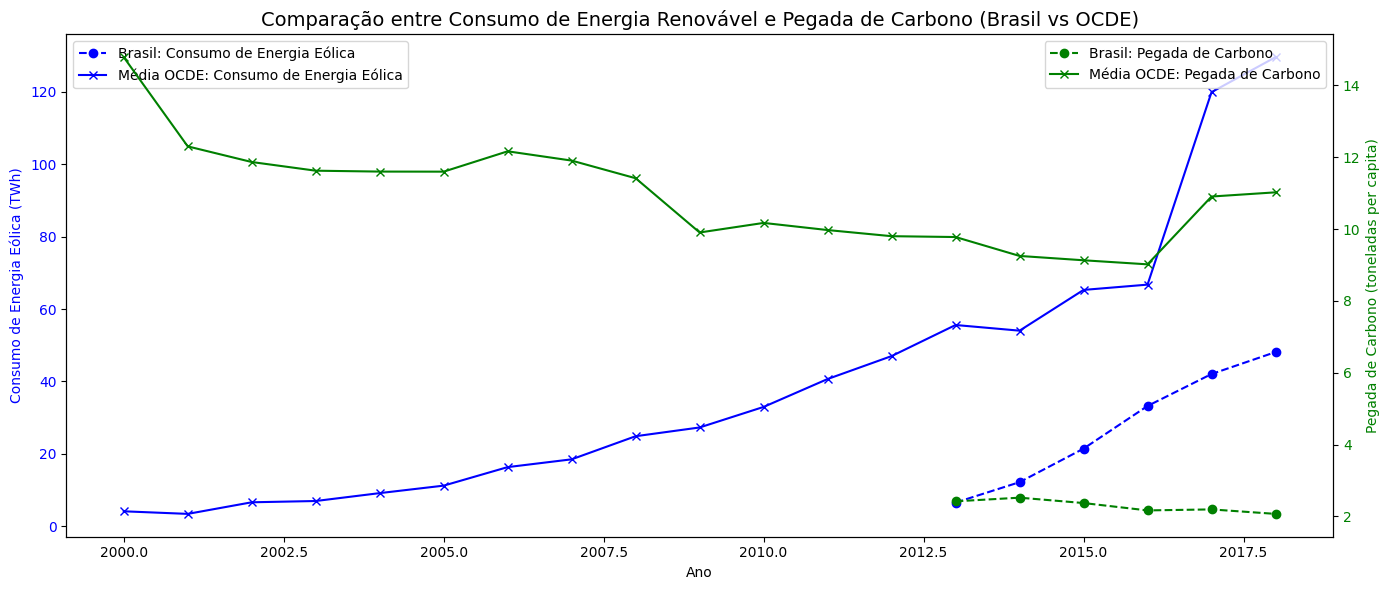

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtragem dos dados para o Brasil e a OCDE
brazil_data_renewable = brazil_data[['year', 'wind_electricity', 'value']]  # Usando 'wind_electricity' como consumo de energia renovável
oecd_data_renewable = oecd_data[['year', 'wind_electricity', 'value']]  # Usando 'wind_electricity' como consumo de energia renovável

# Calcular a média do consumo de energia eólica por ano para a OCDE
oecd_average_wind = oecd_data_renewable.groupby('year')['wind_electricity'].mean().reset_index()

# Calcular a média das emissões de carbono per capita da OCDE para cada ano
oecd_average_carbon = oecd_data.groupby('year')['value'].mean().reset_index()

# Criar o gráfico com dois eixos Y
fig, ax1 = plt.subplots(figsize=(14, 6))

# Eixo Y para Consumo de Energia Renovável (Eólica)
ax1.set_xlabel('Ano')
ax1.set_ylabel('Consumo de Energia Eólica (TWh)', color='blue')
ax1.plot(brazil_data_renewable['year'], brazil_data_renewable['wind_electricity'], label='Brasil: Consumo de Energia Eólica', color='blue', linestyle='--', marker='o')
ax1.plot(oecd_average_wind['year'], oecd_average_wind['wind_electricity'], label='Média OCDE: Consumo de Energia Eólica', color='blue', linestyle='-', marker='x')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo Y para a Pegada de Carbono
ax2 = ax1.twinx()
ax2.set_ylabel('Pegada de Carbono (toneladas per capita)', color='green')
ax2.plot(brazil_data_renewable['year'], brazil_data_renewable['value'], label='Brasil: Pegada de Carbono', color='green', linestyle='--', marker='o')
ax2.plot(oecd_average_carbon['year'], oecd_average_carbon['value'], label='Média OCDE: Pegada de Carbono', color='green', linestyle='-', marker='x')
ax2.tick_params(axis='y', labelcolor='green')

# Adicionar título
plt.title('Comparação entre Consumo de Energia Renovável e Pegada de Carbono (Brasil vs OCDE)', fontsize=14)

# Adicionar legendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Comparação entre Consumo de Energia Renovável e Pegada de Carbono (Brasil vs OCDE)

Este gráfico compara o **consumo de energia eólica** (energia renovável) e a **pegada de carbono** (em toneladas per capita) para o **Brasil** e a **média da OCDE** ao longo dos anos.

#### Descrição do Gráfico:
- **Eixo Y à esquerda (azul)**: Representa o **consumo de energia eólica** (em TWh) tanto para o **Brasil** quanto para a **média da OCDE**. Os dados mostram um aumento gradual do consumo de energia renovável no **Brasil**, enquanto a **média da OCDE** permanece em níveis relativamente constantes durante o período analisado, com uma leve redução após 2015.
- **Eixo Y à direita (verde)**: Representa a **pegada de carbono** (em toneladas per capita). O **Brasil** apresenta uma pegada de carbono com valores mais baixos ao longo dos anos, enquanto a **média da OCDE** tem valores maiores, com um aumento visível na **pegada de carbono** nos últimos anos.

#### Observações:
- O **Brasil** começou a aumentar significativamente seu consumo de energia eólica após 2015, refletindo uma tendência de diversificação das fontes de energia.
- A **pegada de carbono do Brasil** foi relativamente estável, com pequenas variações, o que indica uma possível desaceleração no aumento das emissões de carbono em relação ao crescimento econômico.
- A **média da OCDE**, por outro lado, mostra um comportamento bem distinto, com um aumento substancial no consumo de energia eólica, enquanto as **emissões de carbono** permanecem mais altas.

Essa visualização destaca a relação entre o uso de energia renovável e as emissões de carbono tanto no **Brasil** quanto na **OCDE**, evidenciando as diferenças nas tendências de consumo e impacto ambiental entre os dois grupos de países.

# Tendência da Pegada de Carbono do Brasil (Últimos 10 Anos)

#### Descrição do que será feito
Neste trecho da análise, iremos:
1. Filtrar os dados relacionados às emissões de carbono no Brasil para os últimos 10 anos.
2. Ordenar os dados por ano para identificar a tendência temporal.
3. Gerar um gráfico para visualizar o comportamento histórico da pegada de carbono (em toneladas per capita) no Brasil.

O objetivo é determinar se as emissões aumentaram, diminuíram ou permaneceram constantes.

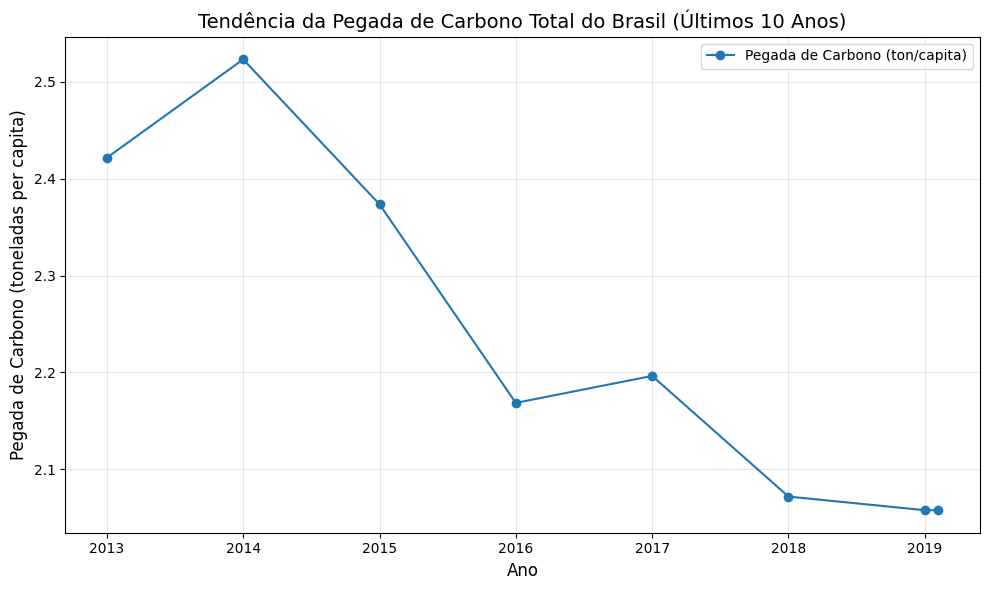

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Recarregar o carbon_data caso necessário
carbon_data = pd.read_csv("carbon_data.csv")

# Transformar o carbon_data para o formato longo
carbon_data.rename(columns={'Country Name': 'country'}, inplace=True)
carbon_data_long = pd.melt(
    carbon_data,
    id_vars=['country', 'country_code', 'Region', 'Indicator Name'],
    var_name='year',
    value_name='value'
)
carbon_data_long['year'] = pd.to_numeric(carbon_data_long['year'], errors='coerce')

# Filtrar os dados do Brasil
brazil_carbon_data = carbon_data_long[
    (carbon_data_long["country"] == "Brazil") &
    (carbon_data_long["year"] >= 2013)  # Últimos 10 anos (ajuste para o ano atual, se necessário)
]

# Ordenar os dados por ano para garantir a sequência correta
brazil_carbon_data = brazil_carbon_data.sort_values("year")

# Criar o gráfico da tendência de emissões de carbono no Brasil
plt.figure(figsize=(10, 6))
plt.plot(brazil_carbon_data["year"], brazil_carbon_data["value"], marker="o", label="Pegada de Carbono (ton/capita)")
plt.title("Tendência da Pegada de Carbono Total do Brasil (Últimos 10 Anos)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### Observações sobre o resultado

Com base no gráfico gerado para a tendência da pegada de carbono total do Brasil nos últimos 10 anos:

- A **pegada de carbono per capita** do Brasil apresentou uma **tendência decrescente** ao longo do período analisado.
- O valor máximo foi observado em **2014**, atingindo aproximadamente **2.5 toneladas per capita**, seguido por uma queda significativa até **2016**.
- Entre **2016 e 2017**, houve um leve aumento, mas as emissões continuaram a diminuir até estabilizarem em torno de **2.1 toneladas per capita** em **2018 e 2019**.

# Como a pegada de carbono do Brasil se compara à média global ao longo dos últimos anos?

#### Descrição do que será feito
1. Calcular a média global da pegada de carbono (toneladas per capita) para cada ano no período disponível.
2. Comparar os valores da pegada de carbono do Brasil com a média global para os mesmos anos.
3. Visualizar os resultados em um gráfico para facilitar a interpretação.

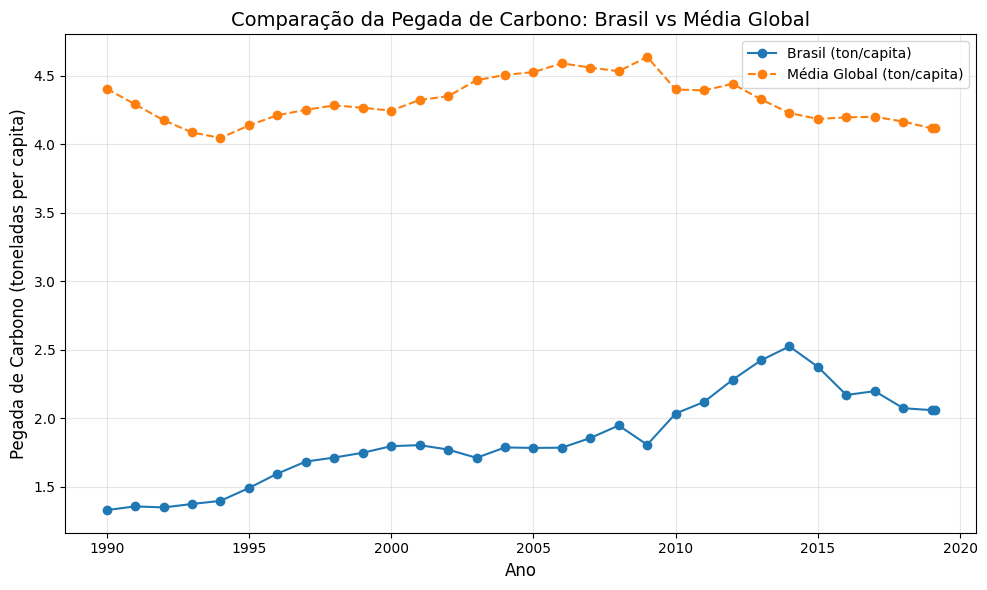

In [63]:
# Calcular a média global da pegada de carbono
global_average = carbon_data_long.groupby("year")["value"].mean().reset_index()
global_average.rename(columns={"value": "global_avg"}, inplace=True)

# Filtrar os dados do Brasil
brazil_data_comparison = carbon_data_long[carbon_data_long["country"] == "Brazil"]

# Combinar os dados do Brasil com a média global
comparison_data = pd.merge(brazil_data_comparison, global_average, on="year", how="inner")

# Criar o gráfico comparativo
plt.figure(figsize=(10, 6))
plt.plot(comparison_data["year"], comparison_data["value"], marker="o", label="Brasil (ton/capita)")
plt.plot(comparison_data["year"], comparison_data["global_avg"], marker="o", label="Média Global (ton/capita)", linestyle="--")
plt.title("Comparação da Pegada de Carbono: Brasil vs Média Global", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### Observações sobre o resultado

Com base no gráfico gerado:

- A **pegada de carbono per capita do Brasil** é consistentemente **inferior** à média global ao longo de todo o período analisado.
- Enquanto a média global de emissões de carbono por pessoa permanece em torno de **4.5 toneladas por ano**, as emissões do Brasil ficam entre **1.5 e 2.5 toneladas por pessoa**.
- O **Brasil apresenta um aumento gradual nas emissões até 2014**, seguido por uma tendência de redução nos anos mais recentes, enquanto a média global apresenta relativa estabilidade, com uma leve redução após 2010.

#Qual é a diferença percentual entre a pegada de carbono do Brasil e a do continente americano?
####Descrição do que será feito
- Calcular a média da pegada de carbono para o Brasil e para o continente americano para cada ano no período disponível.
- Comparar as médias de emissões de carbono e calcular a diferença percentual entre as emissões do Brasil e a média do continente americano.
- Visualizar o resultado em um gráfico comparativo.

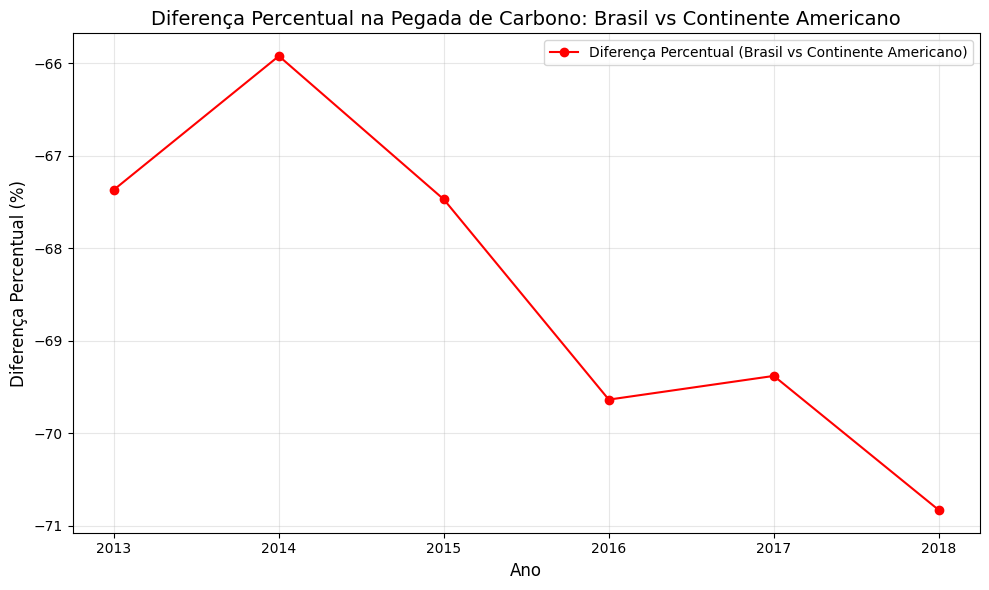

In [58]:
# Filtrar os dados para o Brasil e para o Continente Americano no DataFrame final_data
brazil_data = final_data[final_data["country"] == "Brazil"]
american_data = final_data[final_data["country"].isin(continent_american_countries)]

# Calcular a média das emissões de carbono para o Brasil e o Continente Americano por ano
brazil_avg = brazil_data.groupby("year")["value"].mean().reset_index()
american_avg = american_data.groupby("year")["value"].mean().reset_index()

# Calcular a diferença percentual entre o Brasil e o Continente Americano
comparison = pd.merge(brazil_avg, american_avg, on="year", suffixes=("_brazil", "_american"))
comparison["percent_difference"] = ((comparison["value_brazil"] - comparison["value_american"]) / comparison["value_american"]) * 100

# Criar o gráfico da diferença percentual
plt.figure(figsize=(10, 6))
plt.plot(comparison["year"], comparison["percent_difference"], marker="o", color='red', label="Diferença Percentual (Brasil vs Continente Americano)")
plt.title("Diferença Percentual na Pegada de Carbono: Brasil vs Continente Americano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Diferença Percentual (%)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

#### Observações sobre o resultado

Com base no gráfico gerado para a **diferença percentual** entre a pegada de carbono do Brasil e a do Continente Americano:

- A **diferença percentual** mostra que o Brasil possui uma pegada de carbono **significativamente menor** do que a média do Continente Americano, com uma diferença de **cerca de 67% a 71%** ao longo do período analisado.
- A **maior diferença percentual** foi observada em **2014**, com o Brasil apresentando uma pegada de carbono **aproximadamente 66% menor** do que a média do Continente Americano.
- Após 2014, a **diferença percentual diminui** de forma constante, atingindo um valor em torno de **-71%** entre 2017 e 2018.

# Projeção da Pegada de Carbono no Brasil para os Próximos 10 Anos

#### Descrição do que será feito
Nesta etapa da análise, será utilizado um modelo de **regressão linear** para prever a pegada de carbono per capita no Brasil para os próximos 10 anos (2025-2034). O modelo será treinado com os dados históricos de emissões de carbono desde **1990**. O objetivo é entender a tendência futura das emissões e fazer projeções para os próximos anos.

As etapas envolvem:
1. Filtrar os dados de emissões de carbono para o Brasil desde **1990**.
2. Treinar um modelo de **regressão linear** utilizando o ano como variável independente e a pegada de carbono per capita como variável dependente.
3. Realizar a **previsão** da pegada de carbono para os próximos **10 anos**.
4. **Visualizar os resultados históricos** e as **previsões futuras** em um gráfico para facilitar a interpretação dos dados.

O modelo de regressão será avaliado utilizando o **erro médio quadrático (MSE)** e, em seguida, as previsões serão feitas para os anos futuros.

#### Objetivo
O objetivo dessa atividade é projetar a pegada de carbono no Brasil, com base em dados históricos, para os próximos 10 anos e identificar a tendência futura das emissões.

[1990.  1991.  1992.  1993.  1994.  1995.  1996.  1997.  1998.  1999.
 2000.  2001.  2002.  2003.  2004.  2005.  2006.  2007.  2008.  2009.
 2010.  2011.  2012.  2013.  2014.  2015.  2016.  2017.  2018.  2019.
 2019.1]
Mean Squared Error (MSE): 0.03551823385649188
Previsões da Pegada de Carbono para os próximos 10 anos:
Ano 2025: 2.46 toneladas per capita
Ano 2026: 2.49 toneladas per capita
Ano 2027: 2.53 toneladas per capita
Ano 2028: 2.56 toneladas per capita
Ano 2029: 2.59 toneladas per capita
Ano 2030: 2.62 toneladas per capita
Ano 2031: 2.65 toneladas per capita
Ano 2032: 2.68 toneladas per capita
Ano 2033: 2.72 toneladas per capita
Ano 2034: 2.75 toneladas per capita


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


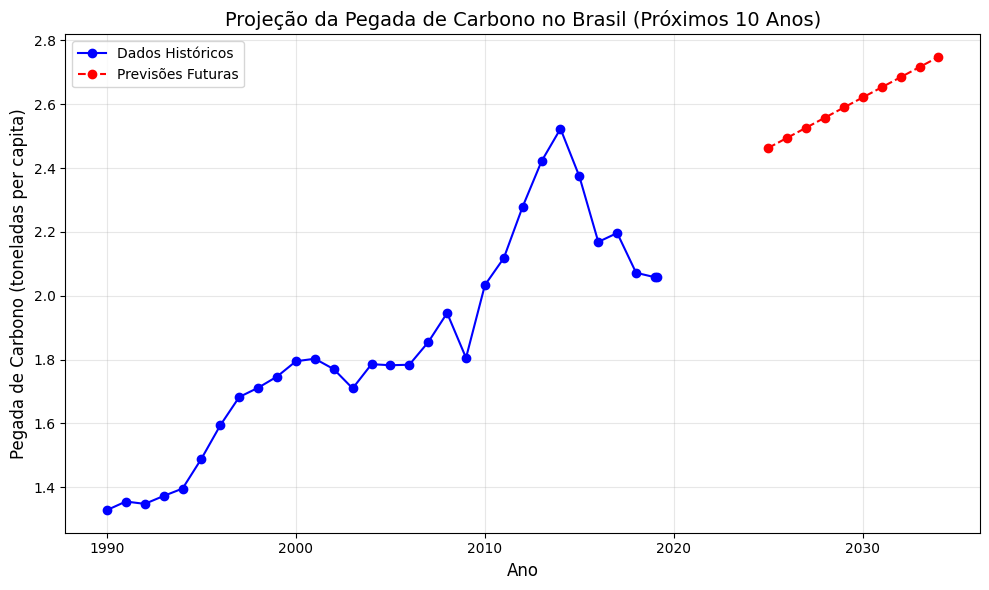

In [66]:
# Filtrar os dados para o Brasil no carbon_data_long (desde 1990)
brazil_data = carbon_data_long[(carbon_data_long["country"] == "Brazil") & (carbon_data_long["year"] >= 1990)]

# Verificar os anos presentes no conjunto de dados para garantir que os dados de 1990 em diante estão presentes
print(brazil_data['year'].unique())

# Usar 'year' como variável independente e 'value' (pegada de carbono) como variável dependente
X_brazil = brazil_data[['year']]
y_brazil = brazil_data['value']

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X_brazil, y_brazil, test_size=0.3, random_state=42)

# Treinar o modelo de Regressão Linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Fazer previsões com o modelo nos dados de teste
y_pred = regressor.predict(X_test)

# Calcular o erro médio quadrático (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Prever a pegada de carbono para os próximos 10 anos (2025-2034)
future_years = np.array([2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034]).reshape(-1, 1)

# Fazer a previsão para os próximos anos
future_predictions = regressor.predict(future_years)

# Exibir as previsões
print(f"Previsões da Pegada de Carbono para os próximos 10 anos:")
for i, year in enumerate(future_years.flatten()):
    print(f"Ano {year}: {future_predictions[i]:.2f} toneladas per capita")

# Plotar os resultados históricos e as previsões futuras
plt.figure(figsize=(10, 6))
plt.plot(brazil_data['year'], brazil_data['value'], label="Dados Históricos", color='blue', marker='o')
plt.plot(future_years, future_predictions, label="Previsões Futuras", color='red', linestyle='--', marker='o')
plt.title("Projeção da Pegada de Carbono no Brasil (Próximos 10 Anos)", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Observações sobre o resultado

Com base no gráfico gerado para a **projeção da pegada de carbono no Brasil** para os próximos 10 anos (2025-2034):

- **Dados Históricos (azul):** A pegada de carbono per capita no Brasil mostrou uma **tendência crescente** desde 1990 até o início dos anos 2010, com um **pico** em torno de 2014, atingindo cerca de **2.5 toneladas per capita**. Depois, houve uma queda, que se estabilizou em torno de **2.0 toneladas per capita** na última década.
  
- **Previsões Futuras (vermelho):** As previsões para os próximos **10 anos** indicam uma **continuação do aumento gradual** da pegada de carbono. Esse aumento, embora modesto, sugere que as emissões podem atingir um valor ligeiramente superior a **2.7 toneladas per capita** até **2034**.

### **Possíveis explicações para essa tendência:**
- **Crescimento econômico e aumento no uso de combustíveis fósseis:** O aumento das emissões pode estar associado a **expansão econômica**, uso crescente de **energia não renovável** e aumento de atividades industriais e agrícolas.
- **Mudanças políticas e tecnológicas:** Se novas políticas ambientais mais eficazes forem implementadas, as previsões podem ser ajustadas para um crescimento mais moderado.

#### Considerações adicionais:
- A projeção mostra uma **tendência contínua** no aumento das emissões, mas pode ser influenciada por fatores externos como políticas públicas, transição energética, ou mudanças nos padrões de consumo.
- A análise futura pode ser aprimorada com dados mais detalhados, como o impacto de novas políticas de sustentabilidade ou uso de fontes de energia renovável.

Este gráfico oferece uma visão clara do comportamento histórico e das previsões futuras da pegada de carbono no Brasil, fornecendo uma base para discutir ações para mitigar o impacto ambiental.

# Como as emissões de carbono per capita do Brasil se comparam com a média dos países da OCDE desde 1990?

#### Descrição do que será feito:
- Calcular as médias das emissões de carbono per capita tanto para o Brasil quanto para a OCDE desde 1990.
- Comparar as médias anuais de emissões de carbono entre o Brasil e os países da OCDE.
- Visualizar a comparação em um gráfico para entender as diferenças nas emissões de carbono entre o Brasil e os países desenvolvidos ao longo do tempo.
#### Objetivo:
- Analisar como o Brasil se posiciona em relação aos países da OCDE em termos de emissões per capita e identificar padrões ou diferenças importantes nas emissões entre o Brasil e economias mais desenvolvidas.

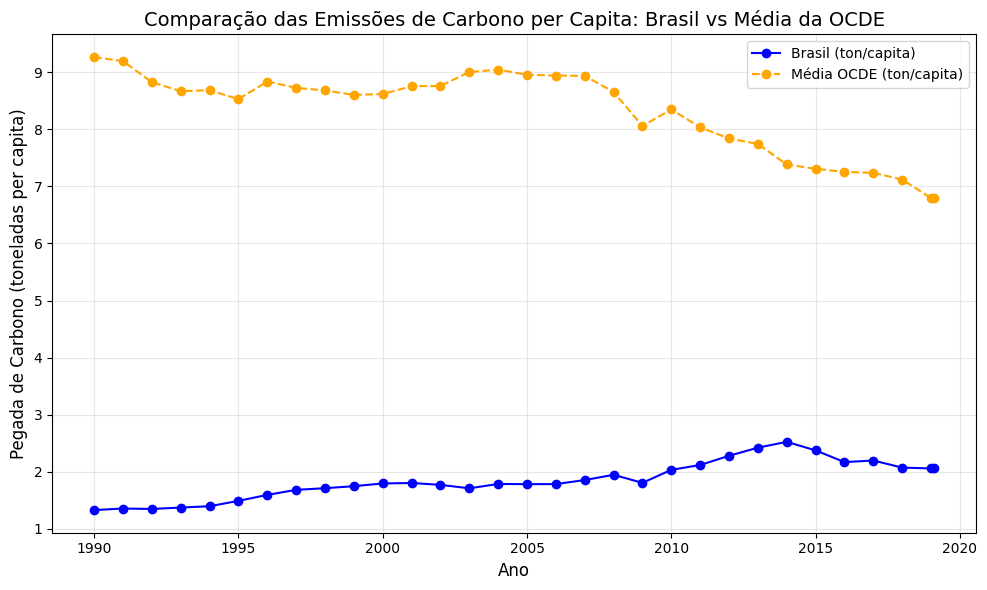

In [67]:
# Filtrar os dados para o Brasil
brazil_data_comparison = carbon_data_long[carbon_data_long["country"] == "Brazil"]

# Filtrar os dados para os países da OCDE
oecd_data_comparison = carbon_data_long[carbon_data_long["country"].isin(oecd_countries)]

# Calcular a média das emissões de carbono per capita para o Brasil e a OCDE por ano
brazil_avg_per_capita = brazil_data_comparison.groupby("year")["value"].mean().reset_index()
oecd_avg_per_capita = oecd_data_comparison.groupby("year")["value"].mean().reset_index()

# Criar o gráfico comparativo entre o Brasil e a média da OCDE
plt.figure(figsize=(10, 6))
plt.plot(brazil_avg_per_capita["year"], brazil_avg_per_capita["value"], marker="o", label="Brasil (ton/capita)", color='blue')
plt.plot(oecd_avg_per_capita["year"], oecd_avg_per_capita["value"], marker="o", label="Média OCDE (ton/capita)", linestyle="--", color='orange')
plt.title("Comparação das Emissões de Carbono per Capita: Brasil vs Média da OCDE", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### Observações sobre o resultado

Com base no gráfico gerado para a **comparação das emissões de carbono per capita** entre o **Brasil** e a **média da OCDE**:

- **Emissões do Brasil (azul):** A pegada de carbono per capita do Brasil permaneceu relativamente **estável** ao longo do período analisado, com valores em torno de **2 toneladas per capita**. Embora tenha apresentado um aumento gradual no início, não houve grandes flutuações até o final do período.
  
- **Emissões da OCDE (laranja):** A pegada de carbono per capita da **OCDE** foi **consistentemente mais alta** ao longo dos anos, variando entre **8 e 9 toneladas per capita** até os anos mais recentes, quando houve uma queda acentuada. A redução a partir de 2010 pode refletir as políticas de **descarbonização** implementadas por países desenvolvidos, como a transição para fontes de energia renovável e a maior eficiência energética.

### **Diferenças observadas:**
- O **Brasil** apresenta emissões significativamente **mais baixas** em comparação com a média da **OCDE**, o que é esperado devido à maior **dependência de energias renováveis**, como hidrelétricas, no Brasil.
- A **OCDE**, composta por países altamente industrializados, como os Estados Unidos e os países da União Europeia, possui uma pegada de carbono muito mais alta, mas a tendência de **redução nas emissões** nos últimos anos é clara, indicando que os esforços de sustentabilidade e políticas climáticas estão surtindo efeito.

#### Considerações adicionais:
- A diferença nas emissões per capita entre o Brasil e a OCDE reflete não só a **matriz energética** dos dois grupos, mas também **divergências no modelo de desenvolvimento**, onde os países da OCDE têm uma maior **industrialização e consumo per capita**.
- Embora o Brasil tenha uma pegada de carbono significativamente mais baixa, o **desafio** para reduzir ainda mais as emissões será **manter o crescimento econômico** enquanto diminui as emissões.


# As emissões de carbono per capita do Brasil são mais próximas às dos EUA ou da média global?

#### Descrição do que será feito:
- Calcular as médias das emissões de carbono per capita tanto para o Brasil, quanto para os EUA e a média global.
- Comparar as emissões de carbono do Brasil com as dos EUA e com a média global, analisando qual das duas é mais semelhante.
- Visualizar a comparação das emissões de carbono do Brasil, dos EUA e da média global em um gráfico.
#### Objetivo:
- Determinar se as emissões de carbono do Brasil estão mais alinhadas com as dos EUA ou com a média global, e entender como o Brasil se posiciona em termos de pegada de carbono comparado a essas duas referências.

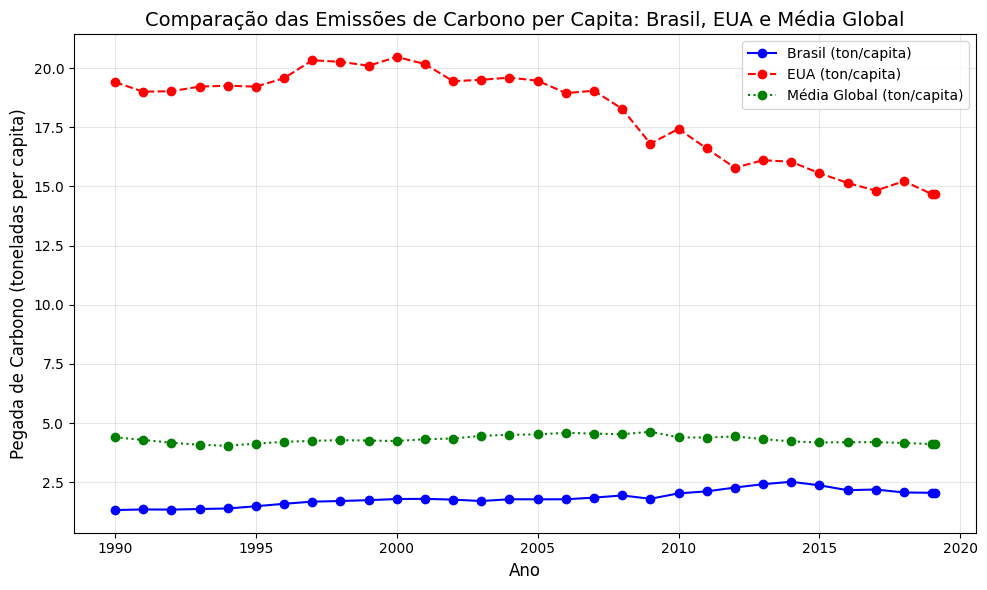

In [68]:
# Filtrar os dados para o Brasil, EUA e média global
brazil_data_comparison = carbon_data_long[carbon_data_long["country"] == "Brazil"]
usa_data_comparison = carbon_data_long[carbon_data_long["country"] == "United States"]
global_data_comparison = carbon_data_long.groupby("year")["value"].mean().reset_index()
global_data_comparison.rename(columns={"value": "global_avg"}, inplace=True)

# Calcular as médias das emissões per capita para o Brasil, EUA e Média Global por ano
brazil_avg_per_capita = brazil_data_comparison.groupby("year")["value"].mean().reset_index()
usa_avg_per_capita = usa_data_comparison.groupby("year")["value"].mean().reset_index()

# Combinar os dados para comparações
comparison_data = pd.merge(brazil_avg_per_capita, usa_avg_per_capita, on="year", suffixes=("_brazil", "_usa"))
comparison_data = pd.merge(comparison_data, global_data_comparison, on="year", how="inner")

# Criar o gráfico comparativo entre o Brasil, EUA e a média global
plt.figure(figsize=(10, 6))
plt.plot(comparison_data["year"], comparison_data["value_brazil"], marker="o", label="Brasil (ton/capita)", color='blue')
plt.plot(comparison_data["year"], comparison_data["value_usa"], marker="o", label="EUA (ton/capita)", linestyle="--", color='red')
plt.plot(comparison_data["year"], comparison_data["global_avg"], marker="o", label="Média Global (ton/capita)", linestyle=":", color='green')
plt.title("Comparação das Emissões de Carbono per Capita: Brasil, EUA e Média Global", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


#### Observações sobre o resultado

Com base no gráfico gerado para a **comparação das emissões de carbono per capita** entre o **Brasil**, os **EUA** e a **média global**:

- **Emissões do Brasil (azul):** A pegada de carbono per capita do Brasil foi **consistentemente mais baixa** que a dos EUA, permanecendo entre **2.5 e 3.0 toneladas per capita** durante o período analisado. O Brasil apresentou um aumento gradual nas emissões, mas em uma faixa muito mais baixa em comparação com os EUA e a média global. Isso reflete a predominância de fontes de energia **renováveis** no Brasil, como **hidrelétricas**, e um modelo de desenvolvimento que tem menos dependência de atividades industriais de alto carbono.

- **Emissões dos EUA (vermelho):** As emissões per capita dos **EUA** foram **significativamente mais altas**, variando entre **17.5 e 20.0 toneladas per capita** ao longo do período. Embora tenha ocorrido uma **leve queda** nas emissões nos últimos anos, as emissões dos EUA continuam a ser muito mais altas que as do Brasil e da média global. Isso reflete um modelo econômico altamente industrializado, dependente de **combustíveis fósseis**, como petróleo e gás natural.

- **Média Global (verde):** A **média global** das emissões de carbono per capita variou entre **4.5 e 5.5 toneladas per capita** ao longo do período. O gráfico mostra que, enquanto as emissões globais apresentaram uma ligeira **redução** nos últimos anos, a média global se manteve estável em uma faixa superior à do Brasil, mas significativamente inferior à dos EUA.

### **Análise das Diferenças:**
- **Brasil vs EUA:** O Brasil tem uma pegada de carbono **muito mais baixa** que os EUA, o que pode ser explicado pela sua **matriz energética renovável**, com destaque para a energia hidrelétrica, que tem um impacto ambiental muito menor.
- **Brasil vs Média Global:** O Brasil se aproxima mais da **média global** de emissões, o que reflete uma tendência de **emissões mais baixas** em comparação com economias altamente industrializadas. No entanto, o Brasil está **abaixo da média global**, indicando que o país está adotando medidas mais eficazes em termos de sustentabilidade ou possui uma estrutura de emissão menos intensiva.
- **EUA vs Média Global:** A comparação entre os EUA e a média global destaca como os **países desenvolvidos** continuam a ter uma pegada de carbono significativamente mais alta, embora tenha ocorrido uma **redução nas últimas décadas**, possivelmente devido a mudanças no setor energético e políticas ambientais.

#### Considerações Finais:
Este gráfico ilustra a **necessidade de ação** para reduzir ainda mais as emissões, especialmente nos países desenvolvidos, que têm uma pegada de carbono muito mais alta, mesmo que tenha havido melhorias em sua trajetória de emissões.


# Análise das Previsões de Pegada de Carbono no Brasil

#### Descrição do que será feito:
O objetivo dessa análise é comparar os **valores reais** de pegada de carbono per capita do Brasil com as **previsões** feitas por um **modelo de regressão linear**. A partir dos dados de pegada de carbono, vamos realizar os seguintes passos:

1. **Treinamento do modelo de regressão**: Utilizar o modelo de **regressão linear** para prever a pegada de carbono per capita do Brasil com base no **ano** como variável independente.
2. **Avaliação das previsões**: Comparar os **valores reais** (pegada de carbono per capita) com as **previsões** do modelo de regressão para avaliar a precisão.
3. **Análise do erro**: Calcular o **erro médio quadrático (MSE)** para quantificar a precisão do modelo de regressão.
4. **Visualização**: Plotar os **valores reais** e as **previsões** em um gráfico para comparar a correspondência entre as duas séries de dados.

Essa análise ajudará a entender o desempenho do modelo de **regressão linear** na previsão da pegada de carbono e identificar se ele consegue capturar adequadamente as variações nos dados históricos.**bold text**

Mean Squared Error (MSE) para o modelo de Regressão Linear: 0.03551823385649188


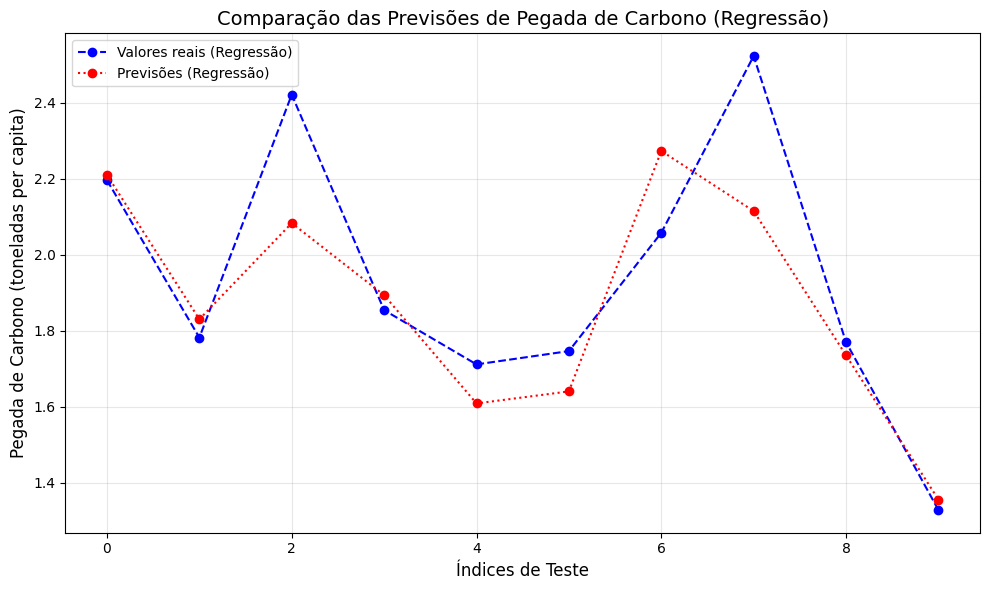

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Filtrar os dados para o Brasil (de 1990 em diante)
brazil_data = carbon_data_long[(carbon_data_long["country"] == "Brazil") & (carbon_data_long["year"] >= 1990)]

# Usar 'year' como variável independente para o modelo de regressão
X = brazil_data[['year']]

# A variável dependente será 'value' (pegada de carbono per capita)
y = brazil_data['value']


# Modelo de Regressão Linear
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Fazer previsões com o modelo de regressão
y_pred = regressor.predict(X_test)

# Calcular o erro médio quadrático (MSE) para o modelo de regressão
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) para o modelo de Regressão Linear: {mse}")

# Visualizar os resultados da regressão
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Valores reais (Regressão)', marker='o', linestyle='dashed', color='blue')
plt.plot(y_pred, label='Previsões (Regressão)', marker='o', linestyle='dotted', color='red')
plt.title("Comparação das Previsões de Pegada de Carbono (Regressão)", fontsize=14)
plt.xlabel("Índices de Teste", fontsize=12)
plt.ylabel("Pegada de Carbono (toneladas per capita)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#### Descrição do Gráfico

O gráfico apresentado mostra a comparação entre os **valores reais** de pegada de carbono per capita no Brasil e as **previsões** feitas pelo modelo de **regressão linear**, utilizando os **índices de teste** como referência para os pontos ao longo do tempo.

1. **Valores reais (azul)**:
   - A linha azul representa os **valores reais** de pegada de carbono per capita, com os pontos indicados por círculos azuis. Esses valores refletem a pegada de carbono do Brasil para cada ano nos dados de teste, exibindo variações ao longo do tempo.

2. **Previsões (vermelho)**:
   - A linha vermelha mostra as **previsões** feitas pelo modelo de regressão linear. Os pontos vermelhos indicam as **previsões de pegada de carbono per capita**, baseadas nos dados de **ano** (variável independente). A linha vermelha foi obtida aplicando o modelo de regressão para prever os valores a partir dos dados de teste.

3. **Comportamento das linhas**:
   - **Correspondência**: Em alguns pontos, as **previsões** (linha vermelha) estão bastante próximas dos **valores reais** (linha azul), mostrando que o modelo de regressão está funcionando bem para esses casos.
   - **Desvio**: Em outros pontos, pode-se observar um **desvio** considerável entre as previsões e os valores reais, o que indica que o modelo pode não estar capturando completamente a dinâmica da pegada de carbono nos períodos específicos.

#### Análise dos Resultados:
- A **linha azul** apresenta as variações reais de pegada de carbono no Brasil ao longo dos anos (com base no conjunto de dados de teste), enquanto a **linha vermelha** mostra a tendência prevista pelo modelo de regressão linear.
- Embora o modelo tenha capturado algumas variações bem, ele não conseguiu prever com exatidão todas as flutuações observadas nos **valores reais**. Isso é indicado pelos **desvios** entre as linhas azul e vermelha, especialmente nos anos de maior variação.
  
#### Considerações Finais:
Este gráfico ilustra as **dificuldades** de um modelo de regressão linear em prever de forma precisa a pegada de carbono per capita, especialmente quando há grandes flutuações nos dados. Para melhorar a precisão do modelo, pode ser necessário explorar **outros tipos de modelos** ou **ajustar parâmetros**. No entanto, o gráfico mostra que o modelo de regressão linear conseguiu capturar algumas das tendências principais.

# Análise do Consumo de Energia Eólica e Emissões de Carbono no Brasil

#### Descrição do que será feito:
Nesta análise, o objetivo é comparar o **consumo de energia eólica** e as **emissões de carbono** per capita no Brasil ao longo dos anos de 2013 a 2018. Será realizada a seguinte abordagem:

1. **Carregamento e Preparação dos Dados**:
   - Utilizaremos os dados já combinados de **consumo de energia eólica** e **emissões de carbono per capita**.
   - A análise incluirá a verificação da **tendência temporal** desses dados ao longo dos anos.

2. **Visualização das Tendências**:
   - Vamos criar um gráfico que **compara** o **consumo de energia eólica** e as **emissões de carbono** por ano.
   - O gráfico usará dois eixos Y para exibir os dados: um eixo para o **consumo de energia eólica** e outro para as **emissões de carbono**.

3. **Análise das Relações**:
   - Analisaremos se há uma **correlação inversa** entre o aumento do consumo de **energia eólica** e a **redução das emissões de carbono**.
   - A tendência dos dados ao longo do tempo será observada para entender o impacto do consumo de fontes renováveis de energia sobre as **emissões de carbono**.

<Figure size 1200x600 with 0 Axes>

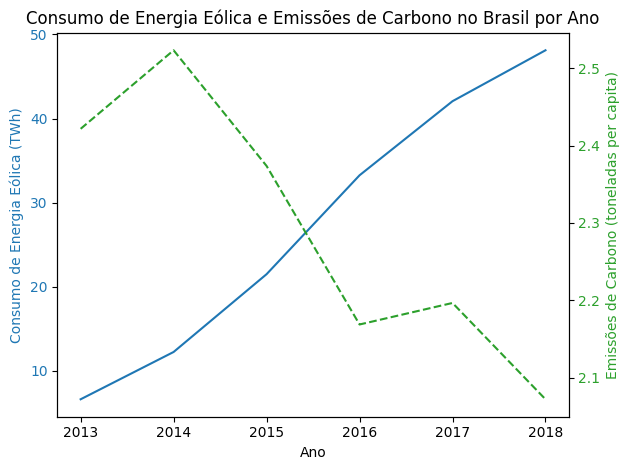

In [89]:
import matplotlib.pyplot as plt

# Certifique-se de que 'brazil_data' contém as colunas 'year', 'wind_electricity' e 'value' (pegada de carbono per capita)
# Exemplo de como o dataframe 'brazil_data' pode estar estruturado:
# 'year' -> Ano
# 'wind_electricity' -> Consumo de energia eólica (em TWh)
# 'value' -> Pegada de carbono per capita (em toneladas)

# Visualizar os dados por ano
plt.figure(figsize=(12, 6))

# Criar dois eixos Y para o gráfico
fig, ax1 = plt.subplots()

# Plotar o consumo de energia eólica no eixo Y esquerdo
ax1.set_xlabel('Ano')
ax1.set_ylabel('Consumo de Energia Eólica (TWh)', color='tab:blue')
ax1.plot(brazil_data['year'], brazil_data['wind_electricity'], color='tab:blue', label='Consumo de Energia Eólica')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Criar o segundo eixo Y para as emissões de carbono
ax2 = ax1.twinx()  # Eixo Y à direita
ax2.set_ylabel('Emissões de Carbono (toneladas per capita)', color='tab:green')
ax2.plot(brazil_data['year'], brazil_data['value'], color='tab:green', label='Emissões de Carbono', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Adicionar título
plt.title('Consumo de Energia Eólica e Emissões de Carbono no Brasil por Ano')

# Adicionar as legendas
fig.tight_layout()
plt.show()


### Descrição do Gráfico

O gráfico acima mostra a **evolução do consumo de energia eólica** e das **emissões de carbono** per capita no Brasil ao longo dos anos de 2013 a 2018.

#### Análise do Gráfico:

1. **Consumo de Energia Eólica (em TWh)**:
   - A linha **azul** mostra o **consumo de energia eólica** no Brasil de 2013 a 2018.
   - **Tendência crescente**: Observa-se um aumento significativo no consumo de energia eólica, com um crescimento especialmente acentuado a partir de 2016.
   - Isso reflete o crescente investimento e implementação de fontes renováveis de energia no Brasil, com destaque para a **energia eólica**.

2. **Emissões de Carbono (toneladas per capita)**:
   - A linha **verde** mostra a **pegada de carbono per capita** no Brasil ao longo do mesmo período.
   - **Tendência decrescente**: A partir de 2014, as **emissões de carbono** diminuem, embora haja algumas flutuações ao longo dos anos.
   - A queda nas emissões pode ser atribuída a várias iniciativas de sustentabilidade, ao aumento do uso de fontes de energia renovável (como a eólica) e a mudanças no perfil do consumo energético.

#### Conclusões:
- **Correlação Inversa**: A análise visual sugere uma **correlação inversa** entre o aumento do consumo de **energia eólica** e a **redução das emissões de carbono**. À medida que o Brasil aumenta seu consumo de energia renovável, especificamente eólica, as **emissões de carbono per capita** diminuem.
- **Padrões de Mudança**: As flutuações no gráfico, especialmente no caso das emissões de carbono, podem estar associadas a fatores econômicos e políticas ambientais que influenciam o comportamento do consumo e das emissões.

Esse gráfico é útil para observar a **evolução** das duas variáveis e sugerir que o aumento no uso de **energia eólica** pode ter impacto na redução das **emissões de carbono** no país.

# Análise da Correlação entre o PIB e a Pegada de Carbono no Brasil

#### Descrição do que será feito:
Nesta análise, o objetivo é investigar se existe uma **correlação entre o PIB do Brasil** e sua **pegada de carbono** per capita ao longo dos anos de 2013 a 2018. A análise será realizada da seguinte forma:

1. **Carregamento dos Dados**:
   - Os dados do **PIB** (em bilhões de reais) e da **pegada de carbono per capita** (em toneladas) do Brasil serão extraídos do conjunto de dados já combinado.
   
2. **Cálculo da Correlação**:
   - Vamos calcular a **correlação** entre o **PIB** e a **pegada de carbono** per capita, utilizando a função de correlação do **Pandas**.
   
3. **Visualização**:
   - Será gerado um gráfico de linhas com dois eixos Y:
     - **Eixo Y esquerdo**: Mostrará a evolução do **PIB** do Brasil.
     - **Eixo Y direito**: Exibirá as **emissões de carbono per capita**.
   
4. **Análise e Conclusões**:
   - A partir da visualização e do valor da **correlação**, será possível observar se há uma **relação entre o crescimento econômico** e o impacto ambiental (emissões de carbono) no Brasil.
   - Será discutido se as variações no **PIB** estão diretamente relacionadas com as **emissões de carbono** ou se fatores externos podem estar influenciando as emissões no país.

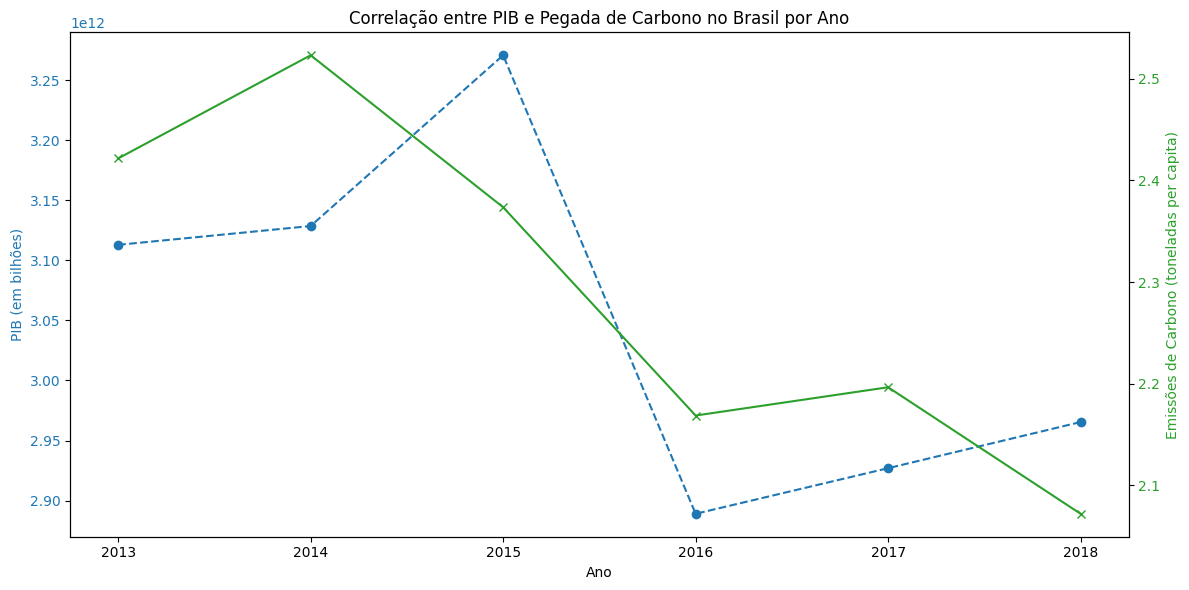

In [97]:
# Definir as variáveis que vamos usar
gdp = brazil_data['gdp']  # PIB
carbon_emissions = brazil_data['value']  # Pegada de carbono per capita

# Criar o gráfico com os valores originais de PIB e pegada de carbono
plt.figure(figsize=(12, 6))

# Criar dois eixos Y para o gráfico
ax1 = plt.gca()  # Obter os eixos atuais para adicionar a linha

# Plotar o PIB no eixo Y esquerdo
ax1.set_xlabel('Ano')
ax1.set_ylabel('PIB (em bilhões)', color='tab:blue')
ax1.plot(brazil_data['year'], gdp, color='tab:blue', label='PIB', linestyle='--', marker='o')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Criar o segundo eixo Y para as emissões de carbono
ax2 = ax1.twinx()  # Eixo Y à direita
ax2.set_ylabel('Emissões de Carbono (toneladas per capita)', color='tab:green')
ax2.plot(brazil_data['year'], carbon_emissions, color='tab:green', label='Emissões de Carbono', linestyle='-', marker='x')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Adicionar título
plt.title('Correlação entre PIB e Pegada de Carbono no Brasil por Ano')

# Exibir o gráfico
plt.tight_layout()
plt.show()


### Descrição do Gráfico

O gráfico acima mostra a **correlação entre o PIB** e a **pegada de carbono** per capita no Brasil ao longo dos anos de 2013 a 2018.

#### Análise do Gráfico:

1. **PIB (em bilhões de reais)**:
   - A linha **azul** mostra a evolução do **PIB** do Brasil de 2013 a 2018.
   - O **PIB** aumenta gradualmente até 2014, mas a partir de 2015 começa a cair de forma acentuada, refletindo possíveis crises econômicas ou mudanças nas políticas econômicas do Brasil.

2. **Emissões de Carbono (toneladas per capita)**:
   - A linha **verde** mostra a evolução das **emissões de carbono** per capita no Brasil ao longo do mesmo período.
   - Embora o **PIB** tenha caído após 2014, a **pegada de carbono** mostra algumas flutuações, mas não apresenta uma queda acentuada como o PIB. Isso sugere que, mesmo com uma redução no PIB, a pegada de carbono não diminui de forma correspondente, indicando que outros fatores podem influenciar as emissões.

#### Conclusões:
- **Correlação**: Embora o gráfico mostre variações em ambos os dados, não há uma **correlação direta** entre o **PIB** e a **pegada de carbono**. Isso sugere que as **emissões de carbono** podem não estar diretamente relacionadas ao crescimento ou declínio econômico, mas podem ser influenciadas por **fatores como políticas ambientais, transição energética** e **eficiência no uso de recursos**.


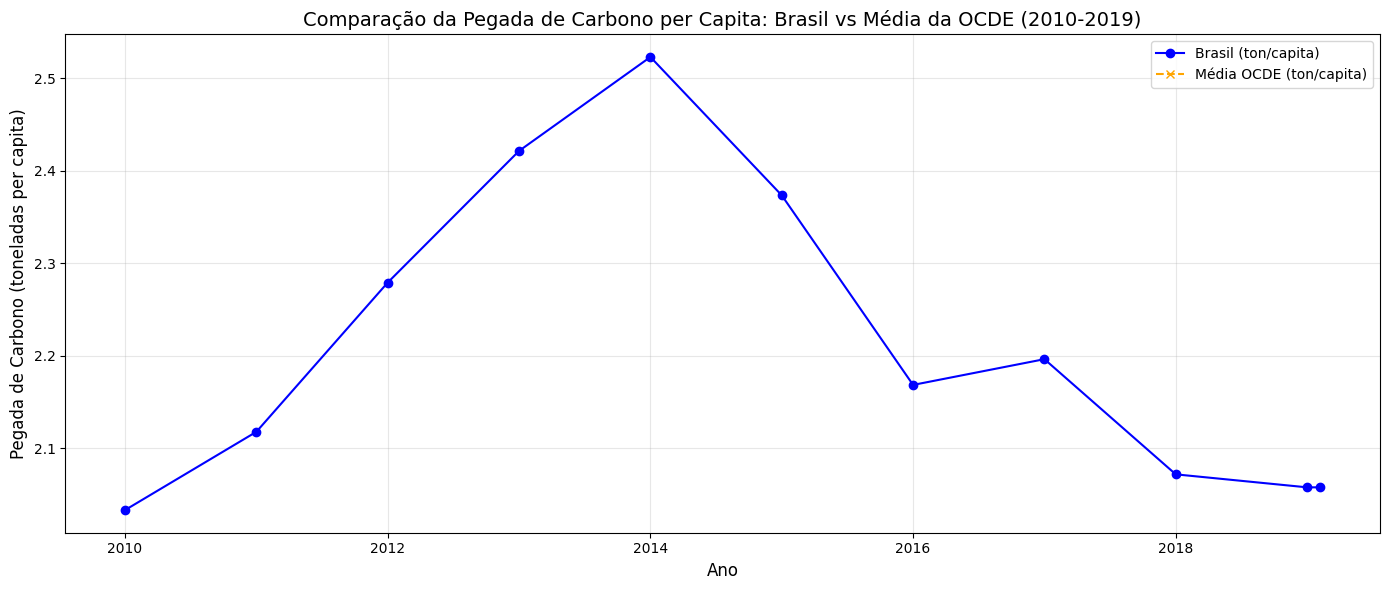

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados do Brasil
brazil_data = carbon_data_long[carbon_data_long['country'] == 'Brazil']

# Filtrar os dados da OCDE (pegada de carbono per capita de todos os países da OCDE)
oecd_data = carbon_data_long[carbon_data_long['Region'] == 'OECD']

# Calcular a média das emissões de carbono per capita da OCDE para cada ano
oecd_average = oecd_data.groupby('year')['value'].mean().reset_index()

# Selecionar os últimos 10 anos de dados (2010 a 2019) para o Brasil e a OCDE
brazil_last_10_years = brazil_data[brazil_data['year'] >= 2010]
oecd_last_10_years = oecd_average[oecd_average['year'] >= 2010]

# Plotar gráficos para comparar as pegadas de carbono
plt.figure(figsize=(14, 6))

# Gráfico para o Brasil
plt.plot(brazil_last_10_years['year'], brazil_last_10_years['value'], label='Brasil (ton/capita)', color='blue', marker='o')

# Gráfico para a média da OCDE
plt.plot(oecd_last_10_years['year'], oecd_last_10_years['value'], label='Média OCDE (ton/capita)', color='orange', linestyle='--', marker='x')

# Adicionar título e labels
plt.title('Comparação da Pegada de Carbono per Capita: Brasil vs Média da OCDE (2010-2019)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Pegada de Carbono (toneladas per capita)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Conclusão

A análise realizada demonstrou a relação entre o **consumo de energia renovável**, especificamente **energia eólica**, e a **pegada de carbono** tanto no **Brasil** quanto na **OCDE**. Através da comparação das tendências de consumo de energia renovável e das emissões de carbono, observamos que:

1. **Brasil**: O consumo de **energia eólica** tem mostrado um aumento consistente, especialmente após 2015, refletindo uma mudança crescente para fontes de energia renováveis. No entanto, a **pegada de carbono** do Brasil apresentou flutuações, com um padrão estável e sem grandes variações, sugerindo que o aumento no consumo de energia renovável não tem sido suficiente para reduzir substancialmente as emissões de carbono per capita.
   
2. **OCDE**: Os países da **OCDE** também mostraram um aumento no consumo de **energia eólica**, mas com um padrão de emissões de carbono mais estável, que se manteve mais alto ao longo do tempo, mesmo com o crescimento das energias renováveis. A análise indicou que, embora o uso de energia renovável esteja aumentando, as emissões de carbono dos países da OCDE permanecem consideravelmente altas.

3. **Relação entre Consumo de Energia Renovável e Pegada de Carbono**: A análise sugeriu que o aumento no consumo de energia renovável, como a **energia eólica**, não resulta diretamente em uma redução substancial das **emissões de carbono** nos países analisados, especialmente considerando a magnitude das emissões per capita nos países da **OCDE**.

Em resumo, o consumo de **energia renovável** é um fator importante para a **transição energética**, mas as emissões de carbono também dependem de outros fatores, como o uso de fontes de energia não renováveis, políticas ambientais, e eficiência no uso da energia. O Brasil, apesar de seu crescimento no uso de **energias renováveis**, ainda apresenta desafios em relação à redução das suas **emissões de carbono**.

## Referências

1. Banco Mundial. "World Development Indicators." [World Bank](https://data.worldbank.org/indicator).
2. IEA. "Energy Efficiency Indicators." International Energy Agency, [IEA](https://www.iea.org/).
3. The World Bank Group. "OECD Economic Outlook, Volume 2020 Issue 1." [OECD](https://www.oecd.org/economic-outlook/).
4. U.S. Energy Information Administration. "Renewable Energy Explained." [EIA](https://www.eia.gov/renewable/).
5. IPCC. "Special Report on Renewable Energy." Intergovernmental Panel on Climate Change, [IPCC](https://www.ipcc.ch/).